In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib_venn import venn3
import matplotlib.ticker as ticker
import numpy as np


In [72]:
# Load data into DataFrame
df = pd.read_csv('/Users/sa21/Desktop/Data_Analyst_Job_Trends/data/raw/Data_search_jobs.csv')
pd.set_option('display.max_columns', None)  # Show all columns
df.head() 

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,Contractor,True,15–25 an hour,data analyst,2023-08-04 03:00:13.797776,United States,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,Contractor,NaN,90K–110K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [73]:
columns_names = df.columns
print(columns_names)
print('All together there are', len(df.columns), 'columns')

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')
All together there are 27 columns


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [75]:
#numbers of rows
rows = len(df)
print('And there are', rows, 'rows')

And there are 61953 rows


In [76]:
# null values
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  37
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              23759
posted_at                190
schedule_type            246
work_from_home         33973
salary                 51865
search_term                0
date_time                  0
search_location            0
commute_time           61953
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_min             52441
salary_max             52441
salary_hourly          56053
salary_yearly          57884
salary_standardized    51865
description_tokens         0
dtype: int64

16 of 27 features have null values. 

# Univariate    

In [77]:
# job titles
job_title_counts = df['title'].value_counts()
job_title_counts

title
Data Analyst                                                  6444
Senior Data Analyst                                           1748
Data Scientist                                                 931
Data Analyst II                                                644
Business Data Analyst                                          495
                                                              ... 
Statistical analysis in jamovi                                   1
GA4 and GTM Tracking Expert - FIX Required                       1
Conversion audit for ecommerce site using Google Analytics       1
I Need Help With My Dying YouTube Channel                        1
Lead FP&A Analyst- Remote, US                                    1
Name: count, Length: 23292, dtype: int64

The words "Data" and "Analyst" are commonly found in most if not all the job postings.

In [78]:
#  names
company_counts = df['company_name'].value_counts()
top_15_company = company_counts.head(15)
top_15_company

company_name
Upwork                              7533
Talentify.io                        2118
Walmart                             1829
vmysmartpros                        1415
Dice                                 862
EDWARD JONES                         747
Corporate                            612
Cox Communications                   538
Insight Global                       483
iSay                                 353
MYSMARTPROS                          266
Centene Corporation                  242
ATC                                  199
Harnham                              171
Staffigo Technical Services, LLC     167
Name: count, dtype: int64

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/4083707963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')


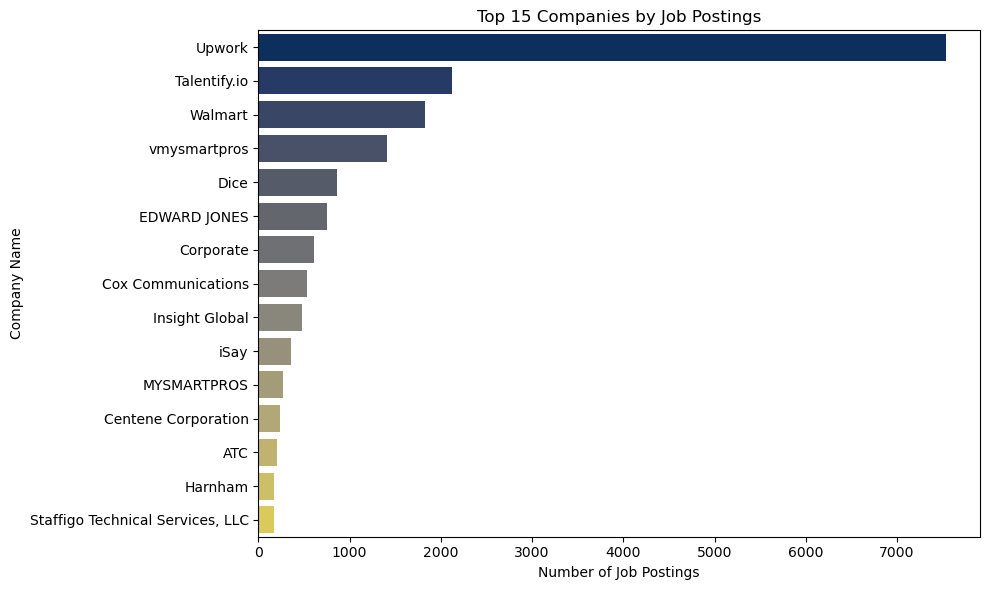

In [79]:
# Top 15 companies
top_15_company = company_counts.head(15)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')
plt.title('Top 15 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

The graph shows that Upwork is the most active company in job postings. This could mean that freelance or gig-based roles or in high demand. Companies like Talentify.io and Walmart follow but with fewer postings. Other companies posted far less compare to the top 3. 

In [80]:
schedules_typ = df['schedule_type'].value_counts(dropna=False)
schedules_typ

schedule_type
Full-time                               45082
Contractor                               9284
Contractor and Temp work                 3130
Full-time and Part-time                  1187
Part-time                                1144
Internship                                516
Full-time and Contractor                  349
Full-time and Temp work                   283
NaN                                       246
Full-time and Internship                  192
Temp work                                 169
Full-time, Part-time, and Internship       92
Full-time, Contractor, and Temp work       85
Part-time, Contractor, and Temp work       47
Part-time and Contractor                   30
Volunteer                                  27
Part-time and Internship                   21
Full-time, Part-time, and Contractor       13
Temp work and Internship                    9
Part-time and Temp work                     9
Full-time and Per diem                      9
Full-time, Part-time

The schedule_type column shows that many job postings list multiple work schedule, such as "Full-time and Contractor" or "Part-time and Temp work." Full-time roles dominate the dataset, followed by Contractor and Contractor and Temp work combinations. This suggests that while single schedule listings are common, most postings offer hybrid or flexible options. To better understand the frequency of different work schedules,I'll visualize the top 40 most common combinations in a bar chart.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/2223986180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


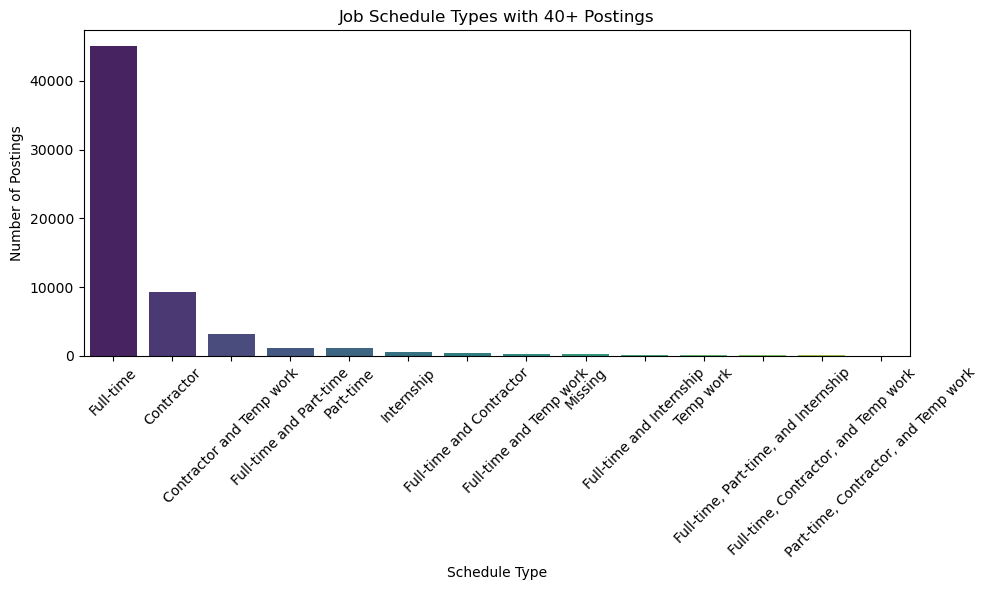

In [81]:
# Count values including NaNs being replaced with 'Missing' for plotting 
schedule_counts = df['schedule_type'].fillna('Missing').value_counts()

# Filter to only show types with 40 or more postings
filtered_counts = schedule_counts[schedule_counts >= 40]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')

plt.title('Job Schedule Types with 40+ Postings')
plt.xlabel('Schedule Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

#### Schedule type transformation

In [82]:
# Sample data
df['schedule_type'] = df['schedule_type'].fillna("")

# Standardize and normalize separators
df['schedule_type_clean'] = (
    df['schedule_type']
    .str.lower()
    .str.replace(r'\s*,\s*', ',', regex=True)
    .str.replace(r'\s+and\s+', ',', regex=True)
)
# Split into list and clean individual entries
def clean_label_list(lst):
    return [x.strip().removeprefix('and ').strip() for x in lst if x.strip()]

df['schedule_type_list'] = df['schedule_type_clean'].str.split(',')
df['schedule_type_list'] = df['schedule_type_list'].apply(clean_label_list)

# renaming to unify variations
rename_map = {
    'full time': 'full-time',
    'fulltime': 'full-time',
    'part time': 'part-time',
    'temp': 'temp work',
    'temporary': 'temp work'
}
df['schedule_type_list'] = df['schedule_type_list'].apply(
    lambda lst: [rename_map.get(x, x) for x in lst]
)

# One-hot encode schedule types
mlb = MultiLabelBinarizer()
schedule_dummies = pd.DataFrame(
    mlb.fit_transform(df['schedule_type_list']),
    columns=[f'is_{x.replace("-", "_").replace(" ", "_")}' for x in mlb.classes_],
    index=df.index
)
# Merge into original DataFrame
df = pd.concat([df, schedule_dummies], axis=1)


I used one-hot encoding to transform the schedule types like full-time or part-time into separate binary columns such as is_full_time. I used MultiLabelBinarizer because some job postings list multiple schedule types in a single row, and this tool helps break them out properly into different variables. I then merged them back into the original DataFrame. The result is a cleaner structure where each schedule type has its own column showing whether it's present in a given job posting. This allows me to get a clearer picture of the schedule types across all postings.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/1292140810.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_sums.values, y=schedule_labels, palette='mako')


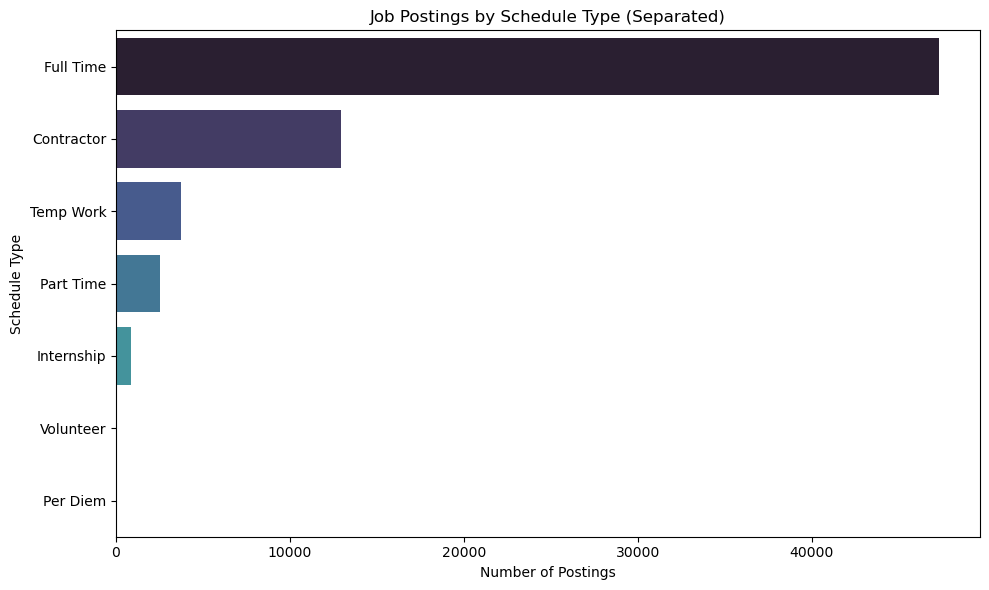

In [83]:
# Count each schedule type
schedule_columns = [col for col in df.columns if col.startswith('is_')]
schedule_sums = df[schedule_columns].sum().sort_values(ascending=False)
schedule_labels = schedule_sums.index.str.replace('is_', '').str.replace('_', ' ').str.title()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=schedule_sums.values, y=schedule_labels, palette='mako')
plt.title('Job Postings by Schedule Type (Separated)')
plt.xlabel('Number of Postings')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()


The frequency of job postings by schedule type after cleaning and standardizing the data. Many entries originally included multiple schedule types so I split and normalized them to count each type individually. Full-time roles are by far the most common, followed by contractor and temp work. Part-time, internship, and volunteer roles appear much less frequently.

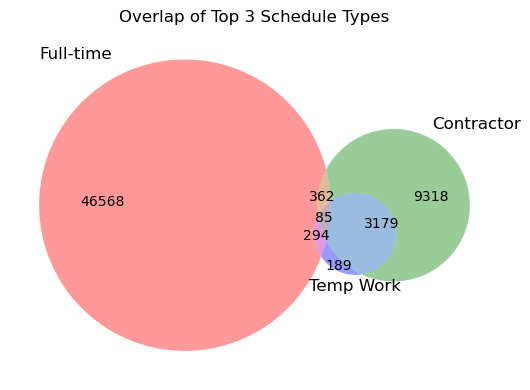

In [84]:
# Create sets for top 3 types
set_full_time = set(df[df.get('is_full_time', 0) == 1].index)
set_contractor = set(df[df.get('is_contractor', 0) == 1].index)
set_temp = set(df[df.get('is_temp_work', 0) == 1].index)

# Plot Venn diagram
plt.figure(figsize=(6, 4))
venn3([set_full_time, set_contractor, set_temp],
      set_labels=('Full-time', 'Contractor', 'Temp Work'))
plt.title('Overlap of Top 3 Schedule Types')
plt.tight_layout()
plt.show()


With the information gathered from the first bar plot, I created a Venn diagram to explore where the top schedule types; Full-time, Contractor, and Temp Work—overlap. This visual helps uncover how often these job types are combined in single postings. For example, a number of postings offer both full-time and contractor roles, while some include all three categories. Understanding these overlaps help us identifying hybrid job opportunities and understand how flexible employers are with scheduling.

In [85]:
# Filter numerical and categorical columns
numer_features = df.select_dtypes(include=['int64', 'float64']).columns
numer_features

Index(['Unnamed: 0', 'index', 'commute_time', 'salary_avg', 'salary_min',
       'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized',
       'is_contractor', 'is_full_time', 'is_internship', 'is_part_time',
       'is_per_diem', 'is_temp_work', 'is_volunteer'],
      dtype='object')

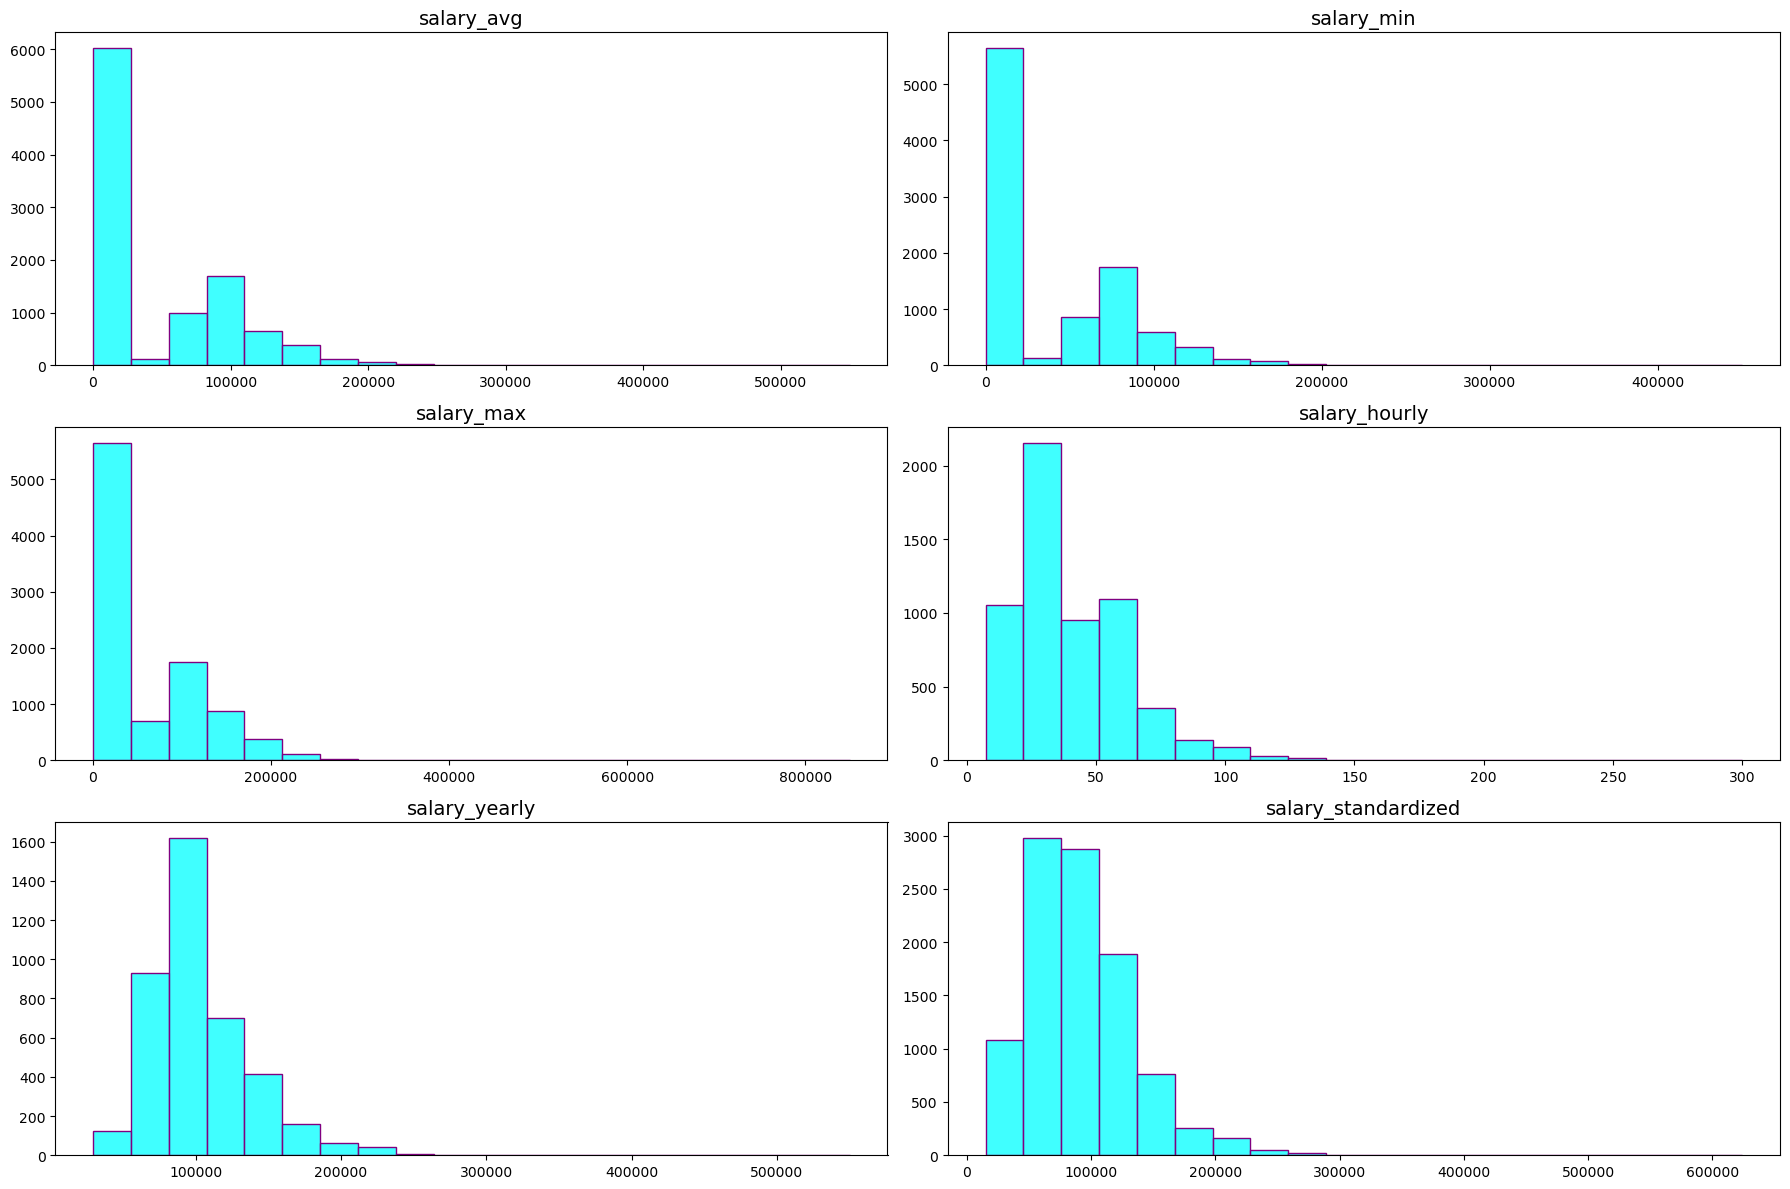

In [86]:
# exclude unwanted columns 
exclude_cols = ['Unnamed: 0', 'index', 'commute_time', 'is_', 'is_and_contractor', 
                'is_and_internship', 'is_and_per_diem', 'is_and_temp_work', 
                'is_contractor', 'is_full-time', 'is_internship', 'is_part-time', 
                'is_per_diem', 'is_temp_work', 'is_volunteer','is_full_time', 'is_part_time']

# Filter numerical features 
numer_features = [col for col in numer_features if col not in exclude_cols]
# Grid setup
n_cols = 2
n_rows = (len(numer_features) + 1) // n_cols  # Dynamic row calculation
plt.figure(figsize=(18, 12)) 

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=20, color='aqua', edgecolor='purple')
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Most of the salary features are right-skewed, with values concentrated on the lower end of the distribution and a long tail stretching toward higher salaries. This is especially noticeable in features like salary_avg, salary_min, and salary_max, where a small number of outliers inflate the upper range. While salary_standardized shows a slightly more compressed shape, it still maintains a right-skewed pattern rather than a true bell curve. These distributions highlight the need for further normalization or transformation if used for modeling, and provide insight into common pay scales in the job market

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/1776535307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')


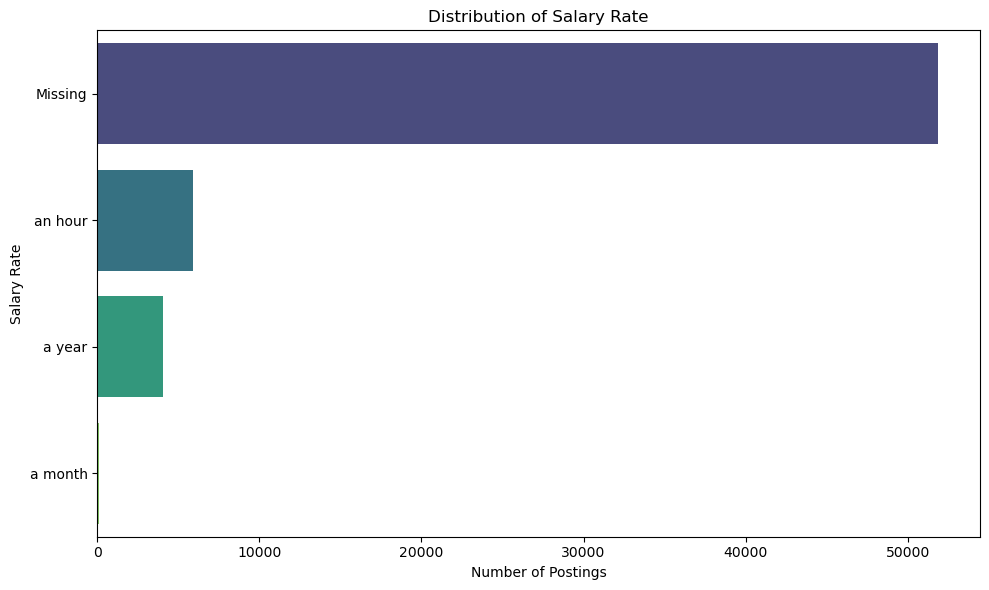

In [87]:
# Fill missing values in 'salary_rate' with 'Missing'
df['salary_rate'] = df['salary_rate'].fillna('Missing')

# Count the occurrences of each salary rate
salary_rate_counts = df['salary_rate'].value_counts().reset_index()
salary_rate_counts.columns = ['salary_rate', 'count']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')
plt.title('Distribution of Salary Rate')
plt.xlabel('Number of Postings')
plt.ylabel('Salary Rate')
plt.tight_layout()
plt.show()

# Bivariate Exploratory Analysis

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/1016281132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')


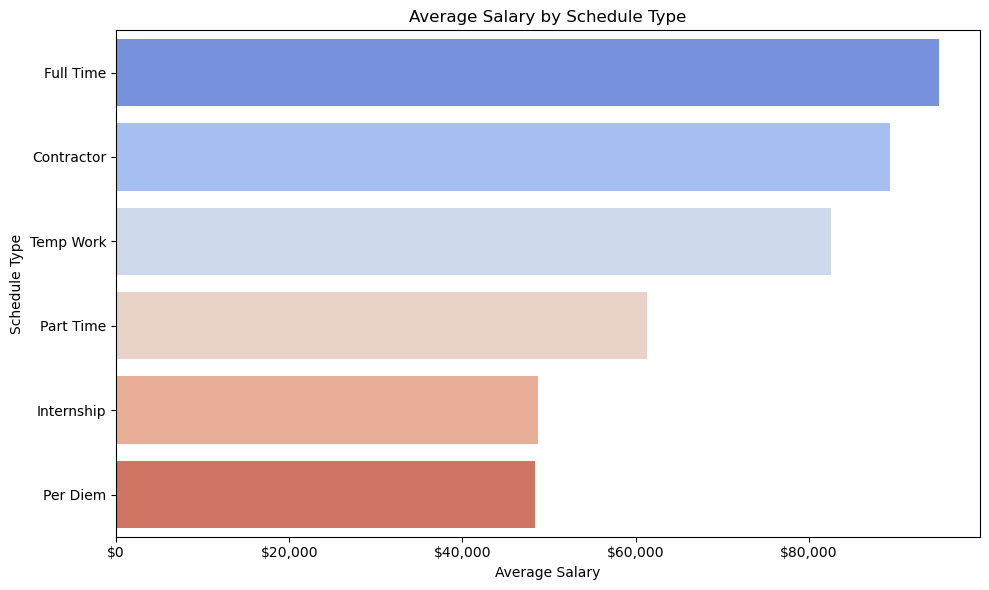

In [88]:
# Get one-hot schedule columns
schedule_columns = [col for col in df.columns if col.startswith('is_')]

# Compute average salary for each schedule type
avg_salary_by_schedule = {
    col.replace('is_', '').replace('_', ' ').title(): df.loc[df[col] == 1, 'salary_standardized'].mean()
    for col in schedule_columns
}
# Convert to pandas Series and drop NaN values
avg_salary_by_schedule = pd.Series(avg_salary_by_schedule).dropna().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 6))
# Format x-axis to display currency
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')
plt.title('Average Salary by Schedule Type')
plt.xlabel('Average Salary')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()


### Clean and standardize the salary_pay column

In [90]:
#clean salary pay function
def clean_salary_pay(s):
    if pd.isna(s) or s == '':
        return np.nan

    # Convert to string and remove unwanted symbols
    s = str(s).replace('$', '').replace(',', '').lower()

    # Handle "K" notation (e.g., 90K)
    s = re.sub(r'(\d+)k', lambda m: str(float(m.group(1)) * 1000), s)

    # Split on common dash types
    parts = re.split(r'[\–\-]', s)  # en dash or hyphen

    try:
        # Convert both ends of range to float
        nums = [float(p.strip()) for p in parts if p.strip() != '']
        if len(nums) == 2:
            return sum(nums) / 2  # average
        elif len(nums) == 1:
            return nums[0]
    except:
        return np.nan

    return np.nan

# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_pay)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())
# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_pay)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())




This function helped me standardizes the messy salary_pay column by converting ranges "$50K–60K" into averaged numerical values and handles "K" notation for thousands. It cleans symbols, splits salary ranges like "50-60" into one number by taking the average, and imputes missing values with the mean. The result is an all numeric column.

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/2753329658.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')


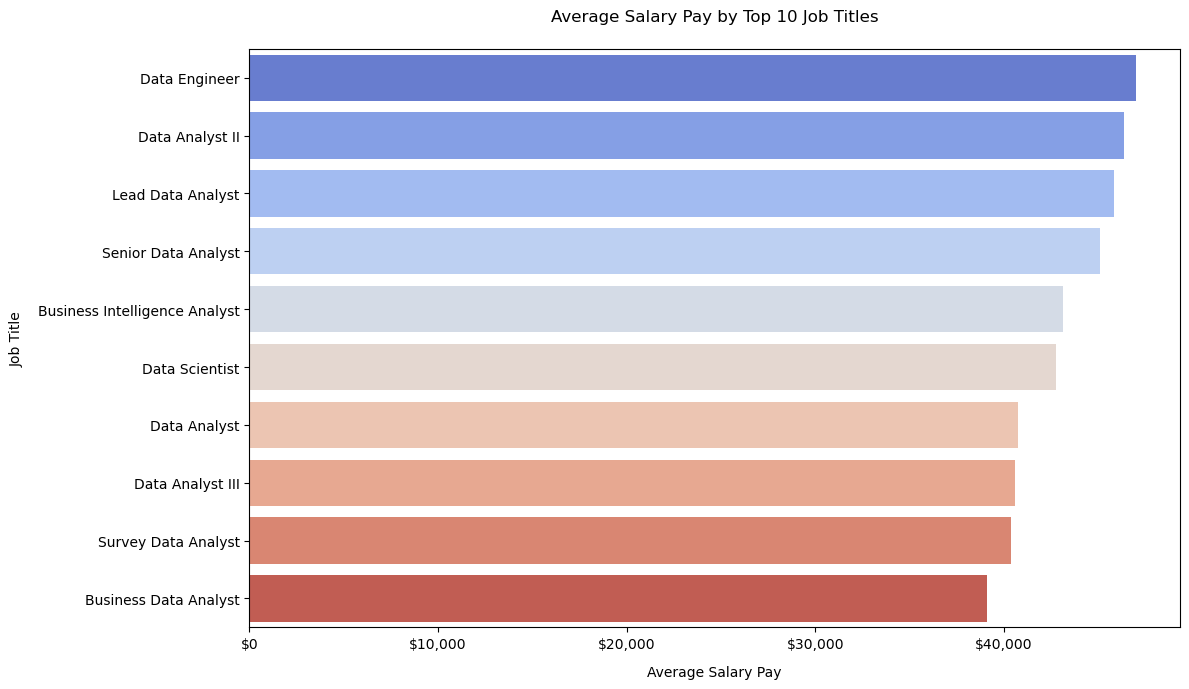

In [91]:
# Limit to top 10 most frequent job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_pay_cleaned by job title - FIXED GROUPBY
salary_by_title = df_top.groupby('title')['salary_pay_cleaned'].mean().sort_values(ascending=False)

# Plotting - FIXED BARPLOT PARAMETERS
plt.figure(figsize=(12, 7))
sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')

# Format x-axis to display currency
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.title('Average Salary Pay by Top 10 Job Titles', pad=20)
plt.xlabel('Average Salary Pay', labelpad=10)
plt.ylabel('Job Title', labelpad=10)
plt.tight_layout()
plt.show()


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/320494082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary_rate', order=df['salary_rate'].value_counts().index, palette='Set2')


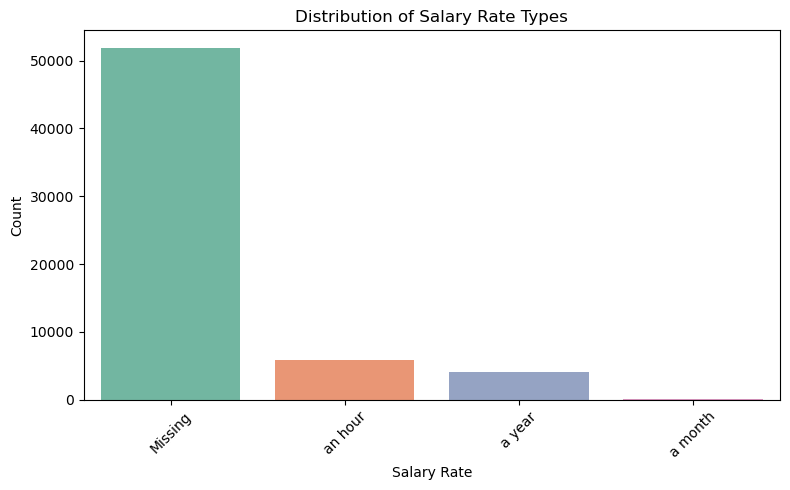

In [93]:
# Countplot of cleaned salary rate types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary_rate', order=df['salary_rate'].value_counts().index, palette='Set2')
plt.title('Distribution of Salary Rate Types')
plt.xlabel('Salary Rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_5269/2879436540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')


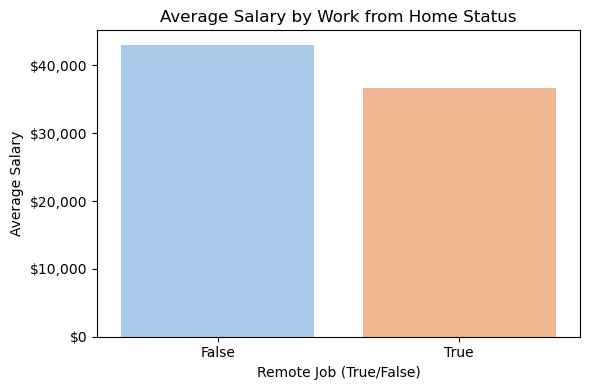

In [99]:
# Replace any NaNs in work_from_home with False or a neutral label
df['work_from_home'] = df['work_from_home'].fillna(False)

# Group and plot
avg_salary_remote = df.groupby('work_from_home')['salary_pay_cleaned'].mean().dropna()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')
# Format x-axis to display currency
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.title('Average Salary by Work from Home Status')
plt.xlabel('Remote Job (True/False)')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


Most job postings have a blank value for the work-from-home column, so I chose to fill the missing rows with False, assuming they represent non-remote positions. I then compared the average salary between remote (True) and non-remote (False) jobs. The results showed that the average salary for non-remote jobs is significantly higher. If this assumption is true, it would suggest that remote jobs tend to pay less on average than in-person roles.

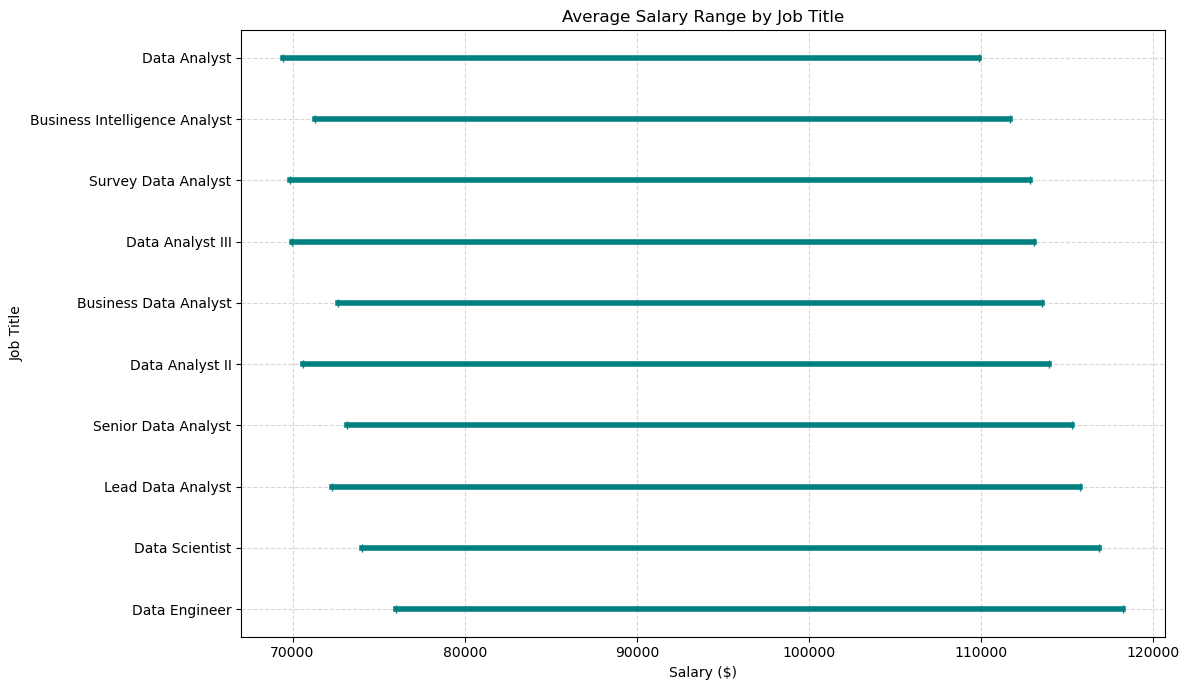

In [60]:
# Convert salary_rate to lowercase and strip whitespace
df['salary_rate_cleaned'] = df['salary_rate'].str.lower().str.strip()

# Convert salary_min and salary_max to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

# Convert hourly salaries to yearly
hourly_mask = df['salary_rate_cleaned'] == 'an hour'
df.loc[hourly_mask, 'salary_min'] = df.loc[hourly_mask, 'salary_min'] * 40 * 52
df.loc[hourly_mask, 'salary_max'] = df.loc[hourly_mask, 'salary_max'] * 40 * 52

# Fill NaNs with average values (optional)
df['salary_min'] = df['salary_min'].fillna(df['salary_min'].mean())
df['salary_max'] = df['salary_max'].fillna(df['salary_max'].mean())

# Limit to top job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_min and salary_max for each title
salary_range = df_top.groupby('title')[['salary_min', 'salary_max']].mean().sort_values(by='salary_max', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
for i, (index, row) in enumerate(salary_range.iterrows()):
    plt.plot([row['salary_min'], row['salary_max']], [index, index], marker='|', color='teal', linewidth=4)

plt.title('Average Salary Range by Job Title')
plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()